In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

from math import floor, ceil, log

dataframes = {
    "top_2017" : pd.read_csv('../datasets/top2017.csv'), 
    "top_2018": pd.read_csv('../datasets/top2018.csv'), 
    "top_2019": pd.read_csv('../datasets/top2019.csv', encoding='mbcs', index_col=0), 
    "top_2010_2019": pd.read_csv('../datasets/top2010-2019.csv', encoding='mbcs', index_col=0)
}
key_map = {
    "top_2017" : {
        "title" : "Top Spotify Tracks of 2017",
        "marker" : "o",
        "color" : "r"
    }, 
    "top_2018": {
        "title" : "Top Spotify Tracks of 2018",
        "marker" : "s",
        "color" : "g"
    }, 
    "top_2019": {
        "title" : "Top 50 Spotify Songs - 2019", 
        "marker" : "D",
        "color" : "b"
    }, 
    "top_2010_2019": {
        "title" : "Top Spotify songs from 2010-2019 - BY YEAR", 
        "marker" : "H",
        "color" : "orange"
    },
}

dataframes["top_2019"] = dataframes["top_2019"].rename(columns={
    "Track.Name": "name", 
    "Artist.Name": "artists",
    "Beats.Per.Minute": "tempo",
    "Loudness..dB..": "loudness",
    "Valence.": "valence",
    "Length.": "duration_ms",
    "Acousticness.." : "acousticness",
    "Speechiness.": "speechiness",
})
dataframes["top_2019"] = dataframes["top_2019"].rename(str.lower, axis="columns")
dataframes["top_2010_2019"] = dataframes["top_2010_2019"].rename(columns={
    "title": "name", 
    "artist": "artists",
    "top genre": "genre", 
    "bpm": "tempo",
    "nrgy": "energy",
    "dnce": "danceability", 
    "dB": "loudness", 
    "live" : "liveness", 
    "val": "valence", 
    "dur": "duration_ms",
    "acous": "acousticness",
    "pop": "popularity",
    "spch": "speechiness"
})

for _ in ["top_2017", "top_2018"]:
    dataframes[_]["rank"] = dataframes[_].index+1

for _ in ["top_2019", "top_2010_2019"]:
    for _2 in ["energy", "danceability", "speechiness", "acousticness", "valence", "liveness"]:
        dataframes[_][_2] /= 100
    dataframes[_]["duration_ms"] *= 1000

In [2]:
def calculate_upper_bound(n: int):
    return 10**(ceil(log(n, 10)))

def scatter(dfs: dict, c1: str, c2: str, nrows=1, ncols=0):
    global key_map
    if ncols <= 0:
        ncols = len(dfs) // nrows
    ret, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows)) 
    ret.suptitle(f"{c2.capitalize()} vs {c1.capitalize()}")
    ret.tight_layout(rect=[0, 0, 1, 1 - (.1/nrows)], h_pad=5, w_pad=3)

    for key, i in zip(dfs, range(len(dfs))):
        try:
            x = dfs[key][c1]
            y = dfs[key][c2]
            max_x = calculate_upper_bound(x.max())
            max_y = calculate_upper_bound(y.max())

        except Exception as e:
            # print(f"{i}: {e}")
            continue
        
        _ = key_map[key]
        if nrows == 1:
            p = axs[i]
        else:
            p = axs[i // ncols][i % nrows] # converts i to an appropriate subplot location
        p.scatter(x, y, marker=_["marker"], color=_["color"])
        p.set_xlim([0, max_x])
        p.set_ylim([0, max_y])
        p.title.set_text(_["title"])
        p.set(xlabel=c1.capitalize(), ylabel=c2.capitalize())
    return ret

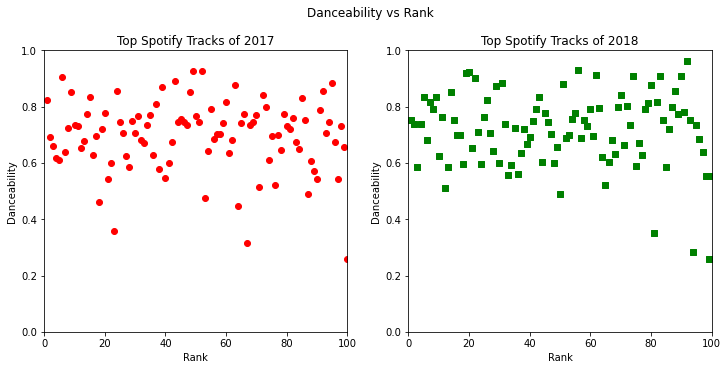

In [3]:
dfs = {_:dataframes[_] for _ in ["top_2017", "top_2018"]}
s = scatter(dfs, "rank", "danceability")

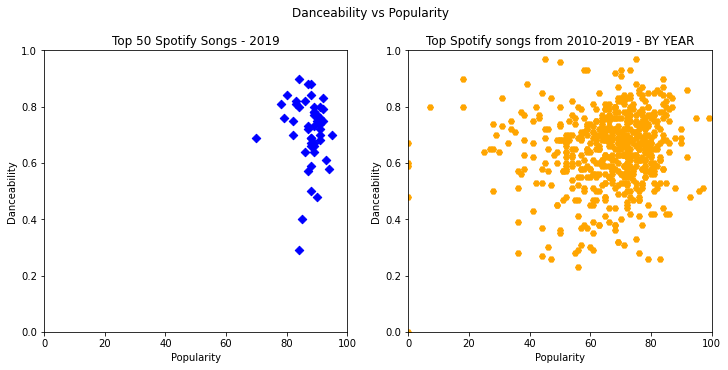

In [4]:
dfs = {_:dataframes[_] for _ in ["top_2019", "top_2010_2019"]}
s = scatter(dfs, "popularity", "danceability")

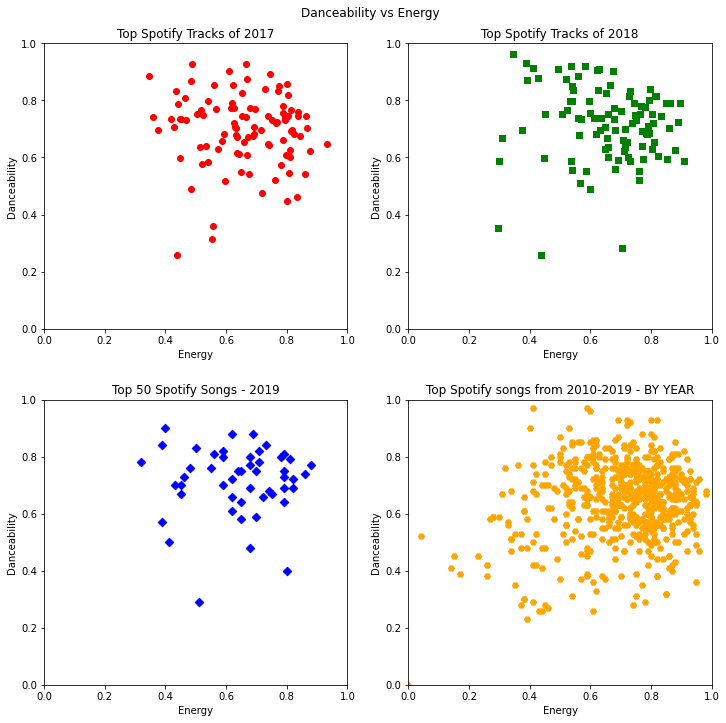

In [5]:
s = scatter(dataframes, "energy", "danceability",  nrows=2)

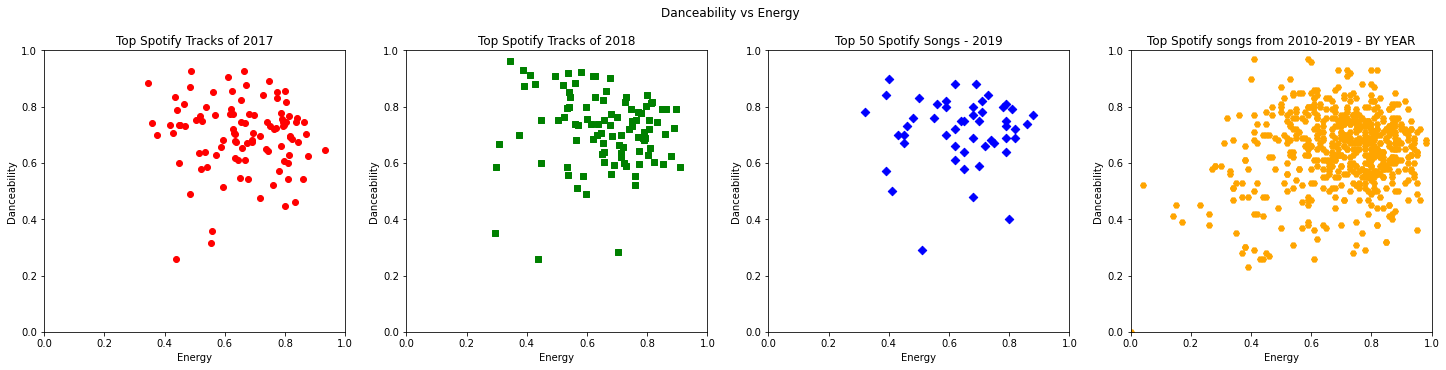

In [6]:
s = scatter(dataframes, "energy", "danceability")

In [42]:
for k in dataframes:
    try:
        print(f"{k}:\t{dataframes[k].corr(method='pearson')['danceability']['popularity']}")
    except KeyError:
        print(f"{k}:\t{dataframes[k].corr(method='pearson')['danceability']['rank']}")

top_2017:	-0.08687914060893295
top_2018:	-0.09487809237096993
top_2019:	-0.07141325258733465
top_2010_2019:	0.11605444461442117


In [ ]:
[]